https://hakuna.work/posts/2024-02-25-titanic-project-machine-learning-from-disaster/

In [33]:
# import packages
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
os.chdir(r"C:\Users\BingruYan\Data Analysis\练习\Titanic")

In [10]:
# load raw data
train_data = pd.read_csv("data/train.csv")    # train data
test_data = pd.read_csv("data/test.csv")      # test data

In [12]:
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Survival counts: Survived
0    549
1    342
Name: count, dtype: int64

Survival rates (%): Survived
0    61.62
1    38.38
Name: proportion, dtype: float64


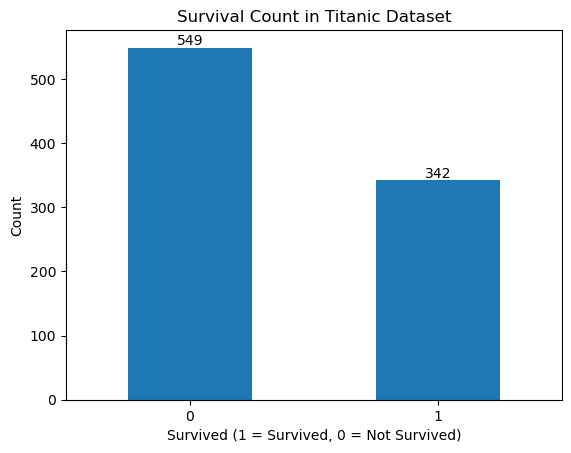

In [29]:
# 计算生存和未生存的乘客数量
survival_counts = train_data['Survived'].value_counts()
# 打印生存和未生存的乘客数量
print(f"Survival counts: {survival_counts}")
# 计算生存和未生存的乘客比例
survival_rates = (train_data['Survived'].value_counts(normalize=True) * 100).round(2)
# 打印生存和未生存的乘客比例
print(f"\nSurvival rates (%): {survival_rates}")
# 绘制条形图
bars = survival_counts.plot(kind='bar')
plt.title('Survival Count in Titanic Dataset')
plt.xlabel('Survived (1 = Survived, 0 = Not Survived)')
plt.ylabel('Count')
plt.xticks(rotation=0)
# 在每个条形上添加数值标签
for bar in bars.patches:
    # 获取条形的位置信息和高度
    y_value = bar.get_height()
    x_value = bar.get_x() + bar.get_width() / 2
    # 设置标签显示的数值
    label = f"{y_value:.0f}"
    # 在条形上方显示标签
    plt.text(x_value, y_value, label, ha='center', va='bottom')
plt.show()

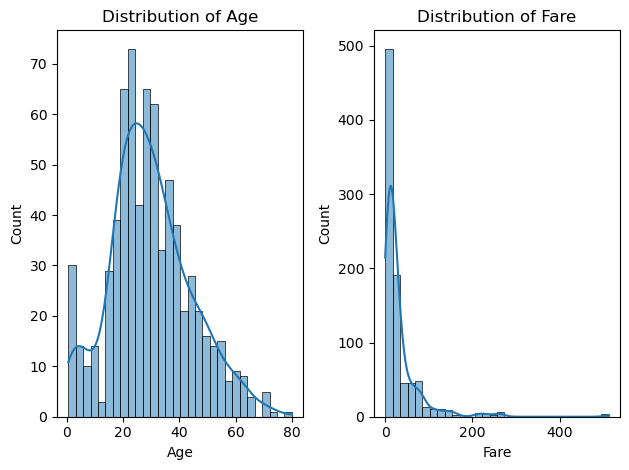

In [35]:
# 绘制 Age 的分布图
plt.subplot(1, 2, 1)  # 1行2列的第一个
sns.histplot(train_data['Age'].dropna(), kde=True, bins=30)
plt.title('Distribution of Age')
# 绘制 Fare 的分布图
plt.subplot(1, 2, 2)  # 1行2列的第二个
sns.histplot(train_data['Fare'].dropna(), kde=True, bins=30)
plt.title('Distribution of Fare')
plt.tight_layout()
plt.show()

从直方图可以看出

年龄分布：约呈右偏态，较多的乘客集中在年轻的年龄段。大多数乘客的年龄在 20 到 40 岁之间。

票价分布：呈现出极度的右偏，表明大多数乘客支付的票价较低。

该分布特征也表明，我们需要考虑特征的极端值对模型训练和性能的影响，导致预测偏向数据的主体部分，而忽视尾部的重要信息。

In [37]:
age_fare_stats = train_data[['Age', 'Fare']].describe()
print(age_fare_stats)

              Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


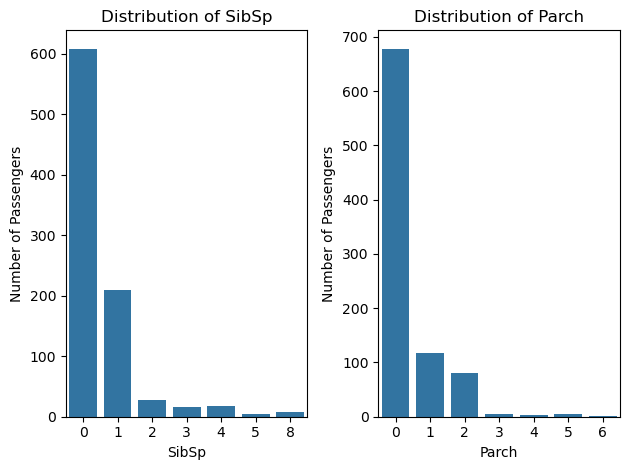

In [42]:
# 绘制 SibSp 的分布
plt.subplot(1, 2, 1)  # 1行2列的第一个
sns.countplot(x='SibSp', data=train_data)
plt.title("Distribution of SibSp")
plt.ylabel("Number of Passengers")
plt.xlabel("SibSp")
# 绘制 Parch 的分布
plt.subplot(1, 2, 2)  # 1行2列的第一个
sns.countplot(x='Parch', data=train_data)
plt.title('Distribution of Parch')
plt.ylabel('Number of Passengers')
plt.xlabel('Parch')
plt.tight_layout()
plt.show()

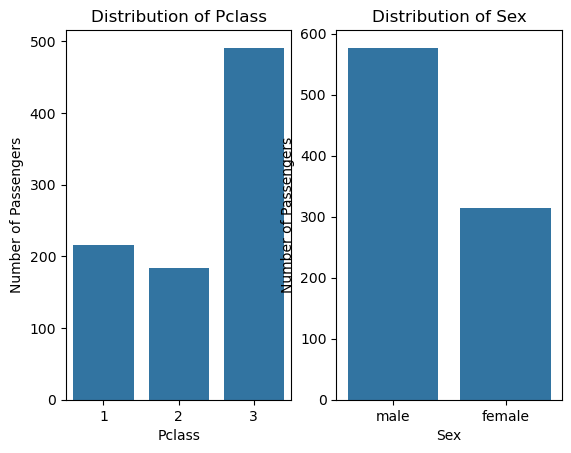

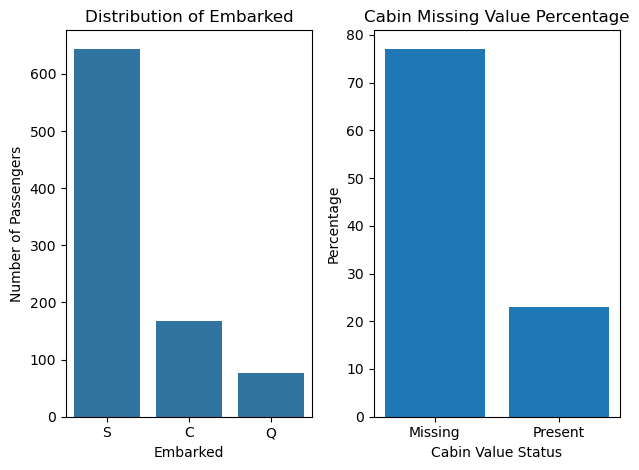

Carbin null percentage (%): 77.10


In [46]:
plt.figure()
# Pclass 分布
plt.subplot(1, 2, 1)
sns.countplot(x='Pclass', data=train_data)
plt.title('Distribution of Pclass')
plt.ylabel('Number of Passengers')
plt.xlabel('Pclass')
# Sex 分布
plt.subplot(1, 2, 2)
sns.countplot(x='Sex', data=train_data)
plt.title('Distribution of Sex')
plt.ylabel('Number of Passengers')
plt.xlabel('Sex')
plt.figure()
# Embarked 分布
plt.subplot(1, 2, 1)
sns.countplot(x='Embarked', data=train_data)
plt.title('Distribution of Embarked')
plt.ylabel('Number of Passengers')
plt.xlabel('Embarked')
# Cabin 缺失值情况
# 计算缺失值比例
cabin_null_percentage = train_data['Cabin'].isnull().sum() / len(train_data) * 100
cabin_not_null_percentage = 100 - cabin_null_percentage
# 绘制 Cabin 缺失值情况的条形图
plt.subplot(1, 2, 2)
plt.bar(['Missing', 'Present'], [cabin_null_percentage, cabin_not_null_percentage])
plt.title('Cabin Missing Value Percentage')
plt.ylabel('Percentage')
plt.xlabel('Cabin Value Status')
plt.tight_layout()
plt.show()
# 输出 Cabin 缺失值的具体比例
print(f"Carbin null percentage (%): {cabin_null_percentage:.2f}")

title counts: Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64
title survival rates: Title
the Countess    1.00
Mlle            1.00
Sir             1.00
Ms              1.00
Lady            1.00
Mme             1.00
Mrs             0.79
Miss            0.70
Master          0.57
Col             0.50
Major           0.50
Dr              0.43
Mr              0.16
Jonkheer        0.00
Rev             0.00
Don             0.00
Capt            0.00
Name: Survived, dtype: float64
title grouped survival rates: Title_Grouped
Mrs       0.79
Miss      0.70
Master    0.57
Rare      0.44
Mr        0.16
Name: Survived, dtype: float64


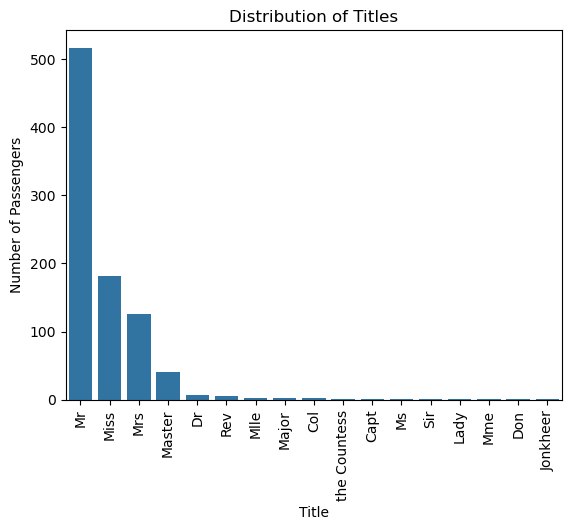

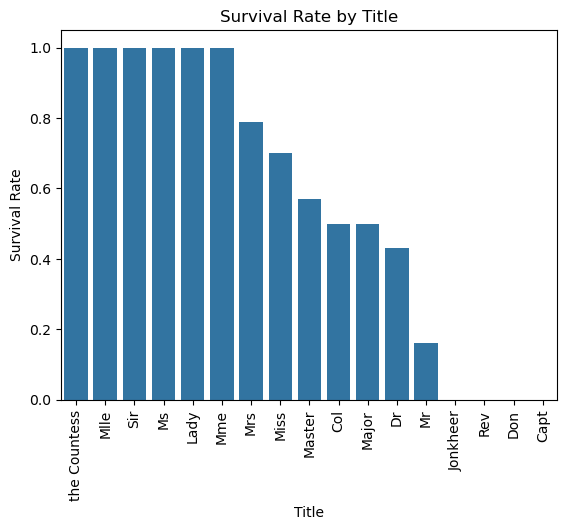

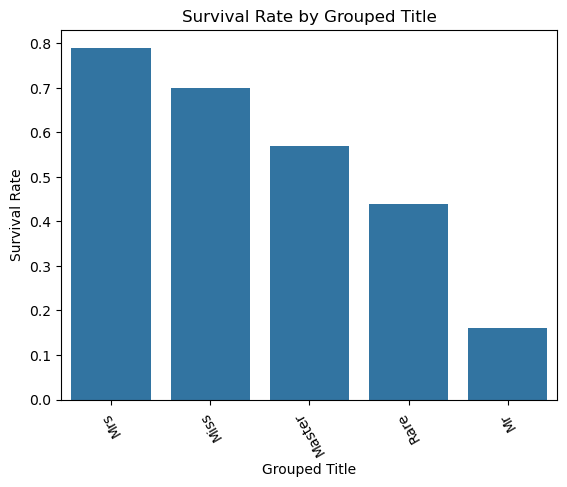

In [55]:
# 提取头衔
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(', ')[1].split('. ')[0])
# 分析头衔分布
title_counts = train_data['Title'].value_counts()
# 关联头衔和生存率
title_survival_rates = (train_data.groupby('Title')['Survived'].mean().sort_values(ascending=False)).round(2)
# 对罕见头衔进行分组
rare_titles = title_counts[title_counts < 10].index  # 假设少于10个乘客的头衔为罕见头衔
train_data['Title_Grouped'] = train_data['Title'].apply(lambda x: 'Rare' if x in rare_titles else x)
# 再次计算分组后的头衔和生存率关系
title_grouped_survival_rates = (train_data.groupby('Title_Grouped')['Survived'].mean().sort_values(ascending=False)).round(2)
# 打印头衔分布
print(f"title counts: {title_counts}")
# 打印头衔和生存率的关系
print(f"title survival rates: {title_survival_rates}")
# 打印分组后的头衔和生存率的关系
print(f"title grouped survival rates: {title_grouped_survival_rates}")
# 绘制头衔分布的条形图
plt.figure()
sns.barplot(x=title_counts.index, y=title_counts.values)
plt.title('Distribution of Titles')
plt.ylabel('Number of Passengers')
plt.xlabel('Title')
plt.xticks(rotation=90)
# 绘制头衔和生存率的关系条形图
plt.figure()
sns.barplot(x=title_survival_rates.index, y=title_survival_rates.values)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Rate')
plt.xlabel('Title')
plt.xticks(rotation=90)
# 绘制分组后的头衔和生存率的关系条形图
plt.figure()
sns.barplot(x=title_grouped_survival_rates.index, y=title_grouped_survival_rates.values)
plt.title('Survival Rate by Grouped Title')
plt.ylabel('Survival Rate')
plt.xlabel('Grouped Title')
plt.xticks(rotation=120)
# 调整子图间距
plt.show()